# Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


# Data exploration

In [16]:
red_df= pd.read_csv("C:/Users/Michael Davidoff/Desktop/CoreAI/Other/תרגול - clustering/Wine_Project/red.csv")

In [17]:
white_df = pd.read_csv("C:/Users/Michael Davidoff/Desktop/CoreAI/Other/תרגול - clustering/Wine_Project/white.csv")

In [18]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

inserting new lables for the data frames

In [20]:
white_df["label"] = 1
red_df["label"] = 0

combining 2 data frames

In [21]:
new_combined = pd.concat([white_df,red_df],axis=0,sort=False)

In [22]:
new_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


fixing column mess

In [23]:
rmv = ["new_column_label","new_columns_label"]
new_combined2 = new_combined[[c for c in new_combined.columns.tolist() if c not in rmv]]

In [24]:
new_combined2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'label'],
      dtype='object')

dtypes

In [25]:
new_combined2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
label                     int64
dtype: object

In [26]:
new_combined2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


checking for nulls

In [27]:
new_combined2.isnull().sum().sum()

0

# First we'll analyze 'label'

In [28]:
new_combined2['label'].describe()

count    6497.000000
mean        0.753886
std         0.430779
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

Lets visualize that

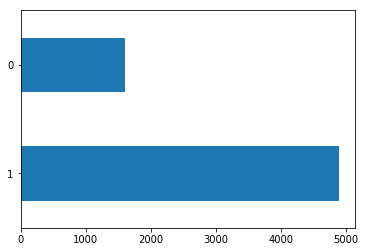

In [29]:
new_combined2['label'].value_counts().plot.barh()
plt.show()

As we can see there are much more 1's (white wine) then 0's (red wine)

# hist for columns

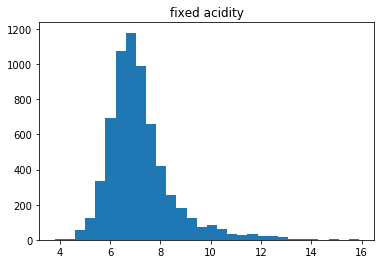

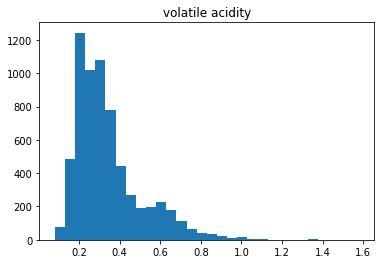

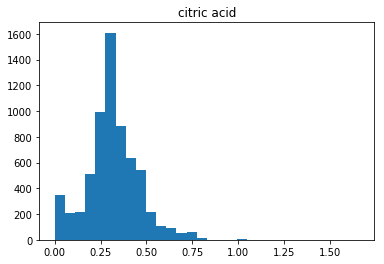

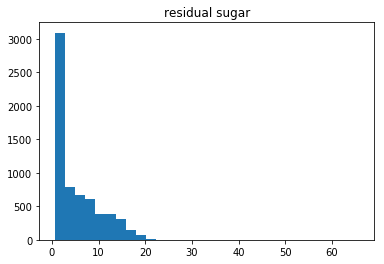

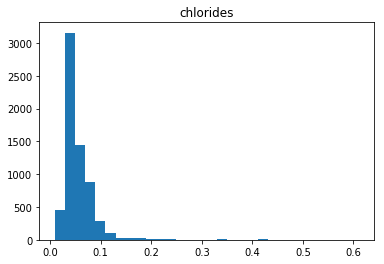

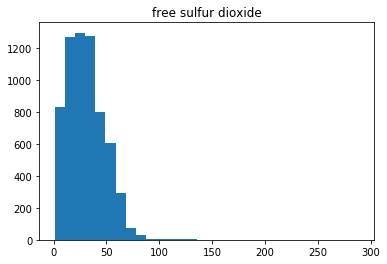

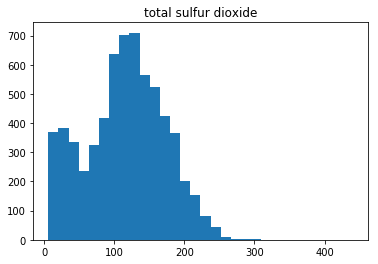

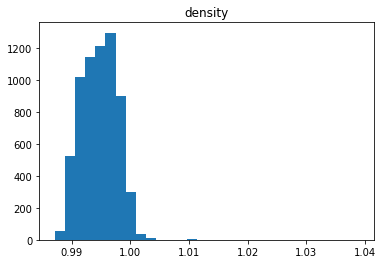

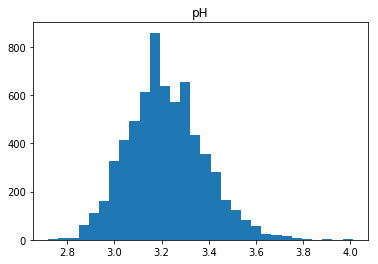

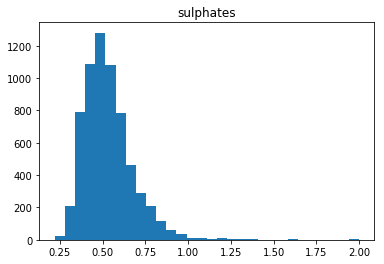

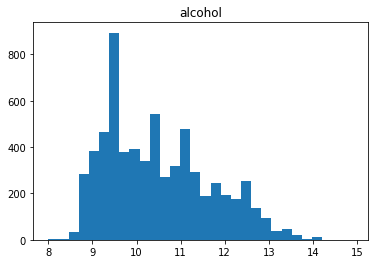

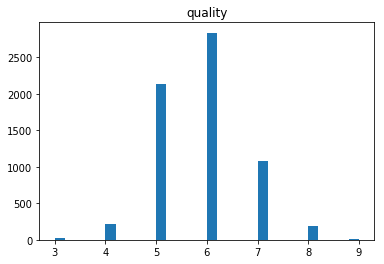

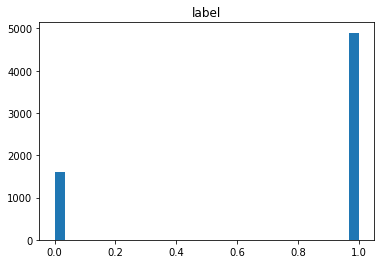

In [30]:
for col in new_combined2.columns.tolist():
    plt.hist(new_combined[col],bins=30)
    plt.title(col)
    plt.show()

# We shall now investigate correlations with the label

In [31]:
cols = []
for col in new_combined2.columns.tolist():
    cols.append(col)


In [32]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'label']

In [33]:
#sns.set()
#sns.pairplot(new_combined2[cols].dropna(), height=2.0)
#plt.show()

this mega scatter plot gives us a reasonable idea about variables relationships.

# Data Preproecing

Resampling

As we saw in the first part, the data is highly imbalanced (more 1's than 0's). To solve this problem we will use a resampling method called under-sampling

In [34]:
# Class count
count_class_0, count_class_1 = new_combined2.label.value_counts()

# Divide by class
df_class_0 = new_combined2[new_combined2['label'] == 0]
df_class_1 = new_combined2[new_combined2['label'] == 1]

In [35]:
df_class_1_under = df_class_1.sample(count_class_1 )
df_train_under = pd.concat([df_class_1_under, df_class_0], axis=0)

Now the dataset is more balanced:

Random under-sampling:
1    1599
0    1599
Name: label, dtype: int64


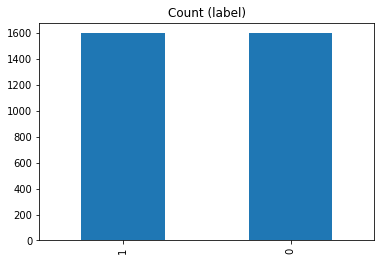

In [36]:
print('Random under-sampling:')
print(df_train_under.label.value_counts())

df_train_under.label.value_counts().plot(kind='bar', title='Count (label)');

In [37]:
df_train_under.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
1106,5.2,0.24,0.45,3.8,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8,1
2609,7.1,0.20,0.30,0.9,0.019,4.0,28.0,0.98931,3.20,0.36,12.0,6,1
3287,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7,1
1657,7.8,0.40,0.49,7.8,0.060,34.0,162.0,0.99660,3.26,0.58,11.3,6,1
598,5.9,0.27,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8,1


In [38]:
rmv1 = ["label"]
no_label = df_train_under[[c for c in df_train_under.columns.tolist() if c not in rmv1]]

In [39]:
no_label.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1106,5.2,0.24,0.45,3.8,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8
2609,7.1,0.20,0.30,0.9,0.019,4.0,28.0,0.98931,3.20,0.36,12.0,6
3287,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7
1657,7.8,0.40,0.49,7.8,0.060,34.0,162.0,0.99660,3.26,0.58,11.3,6
598,5.9,0.27,0.29,11.4,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8


Two more things we want to do before modeling the Data

remove outliers based on Z-score of each value in the column, 
relative to the column mean and standard deviation. 
This is done prior to label encoding. 
Thats because when we tried otherwise we noticed that more than 2/3 of the data was thrown        away.
     
standatization - Many machine learning algorithms work better
when features are on a relatively similar scale and close to normally distributed

In [40]:
from scipy import stats

description:

For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, result of this condition is used to index the dataframe.

In [41]:
no_label[(np.abs(stats.zscore(no_label)) < 3).all(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1106,5.2,0.240,0.45,3.80,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8
2609,7.1,0.200,0.30,0.90,0.019,4.0,28.0,0.98931,3.20,0.36,12.0,6
3287,6.8,0.210,0.31,2.90,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7
1657,7.8,0.400,0.49,7.80,0.060,34.0,162.0,0.99660,3.26,0.58,11.3,6
598,5.9,0.270,0.29,11.40,0.036,31.0,115.0,0.99490,3.35,0.48,10.5,8
4171,6.6,0.220,0.37,1.60,0.040,31.0,101.0,0.99009,3.15,0.66,12.0,5
2375,7.0,0.320,0.29,4.90,0.036,41.0,150.0,0.99168,3.38,0.43,12.2,6
2603,6.7,0.300,0.29,2.80,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7
2331,7.5,0.300,0.32,1.40,0.032,31.0,161.0,0.99154,2.95,0.42,10.5,5
1137,6.1,0.310,0.37,8.40,0.031,70.0,170.0,0.99340,3.42,0.40,11.7,8


# Modeling

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
#normalize the data
from sklearn import preprocessing
from sklearn.preprocessing import scale
x=scale(df_train_under)
y=df_train_under["label"]

In [52]:
from sklearn.decomposition import PCA

In [54]:
# initialize PCA
pca = PCA(n_components=2)
# Fit the model with the data
pca.fit(x)
# apply the PCA on the data (or on new data)
X_new = pca.transform(x)
# Percentage of variance explained by each of the
#selected components (used for plotting also)
pca.explained_variance_ratio_
# See the components
pca.components_

array([[ 0.25610562,  0.34141319, -0.09063559, -0.23862711,  0.29285175,
        -0.3505123 , -0.40421339,  0.23426694,  0.16592813,  0.2762949 ,
        -0.05042819, -0.11671746, -0.45360972],
       [ 0.3003962 , -0.04813222,  0.297134  ,  0.35759602,  0.20617108,
         0.1498144 ,  0.19704743,  0.48134332, -0.3200363 ,  0.08029529,
        -0.4422142 , -0.22616387,  0.01542304]])

In [57]:
clustering = KMeans(n_clusters=2, random_state=3)
clustering.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [58]:
X_new

array([[-2.04548157, -2.33128505],
       [-1.12702906, -2.58919879],
       [-2.06274777, -0.82050069],
       ...,
       [ 1.43004121, -1.30681545],
       [ 1.76716099, -1.21269485],
       [ 0.7196568 , -0.75160399]])

# Ploting 

In [59]:
print(clustering.cluster_centers_)

[[ 1.92237188 -0.0210357 ]
 [-1.91756896  0.02098314]]


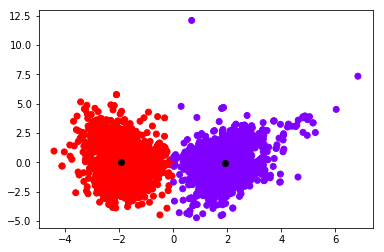

In [61]:
plt.scatter(X_new[:,0], X_new[:,1], c=clustering.labels_, cmap='rainbow')
plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

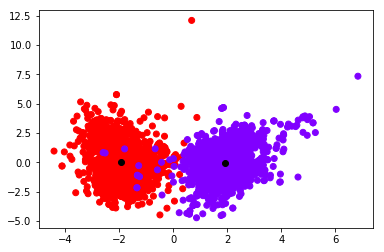

In [62]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap='rainbow')
plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')